# Câncer de pele

## Importar bibliotecas

In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
import os
from sklearn.decomposition import PCA

### Testando pra ver se vai mesmo

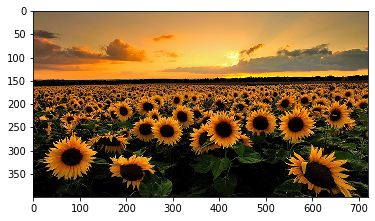

In [270]:
img=mpimg.imread('girassol.jpg')
imgplot = plt.imshow(img)

In [271]:
img.shape

(400, 720, 3)

In [272]:
data = img / 255

In [273]:
data.shape

(400, 720, 3)

In [274]:
data = data.reshape(400 * 720, 3)
data.shape

(288000, 3)

In [275]:
kmeans = KMeans(4)
kmeans.fit(data)
labels = kmeans.predict(data)

In [276]:
new_colors = kmeans.cluster_centers_[kmeans.labels_]
recolored = new_colors.reshape(img.shape)
recolored.shape

(400, 720, 3)

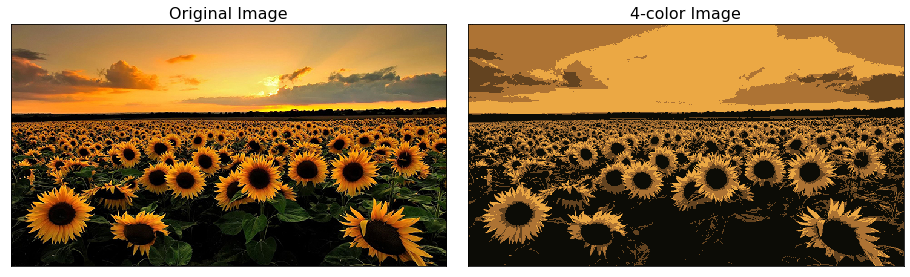

In [278]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(recolored)
ax[1].set_title('4-color Image', size=16);

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
#plt.imsave('girassol_4.png', recolored)

### Foi ? Vamos lá então

In [325]:
recolored_list=[]
path = 'data/train/benign'
path_test = os.listdir(path=f'{path}')
for item in range(0,100):
    foto = path_test[item]
    img=mpimg.imread(f'{path}/{foto}')
    scaled = img / 255
    data = scaled.reshape(scaled.shape[0] * scaled.shape[1], scaled.shape[2])
    kmeans = KMeans(4)
    kmeans.fit(data)
    labels = kmeans.predict(data)
    new_colors = kmeans.cluster_centers_[kmeans.labels_]
    recolored = new_colors.reshape(data.shape)
    recolored_list.append(recolored.reshape(scaled.shape[0]*scaled.shape[1]*scaled.shape[2]))
train_b = pd.DataFrame(recolored_list)

In [326]:
recolored_list=[]
path = 'data/train/malignant'
path_test = os.listdir(path=f'{path}')
for item in range(0,100):
    foto = path_test[item]
    img=mpimg.imread(f'{path}/{foto}')
    scaled = img / 255
    data = scaled.reshape(scaled.shape[0] * scaled.shape[1], scaled.shape[2])
    kmeans = KMeans(4)
    kmeans.fit(data)
    labels = kmeans.predict(data)
    new_colors = kmeans.cluster_centers_[kmeans.labels_]
    recolored = new_colors.reshape(data.shape)
    recolored_list.append(recolored.reshape(scaled.shape[0]*scaled.shape[1]*scaled.shape[2]))
train_m = pd.DataFrame(recolored_list)

### Plotando as imagens...

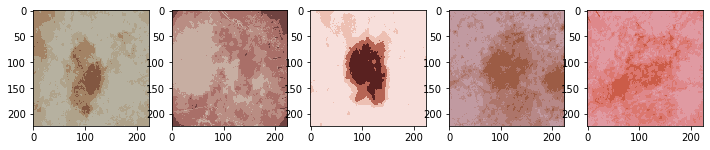

In [298]:
fig, ax = plt.subplots(1, 5, figsize=(12, 12))
for i, axi in enumerate(ax.flat):
    axi.imshow(train_m.loc[i,:].values.reshape(224,224,3))

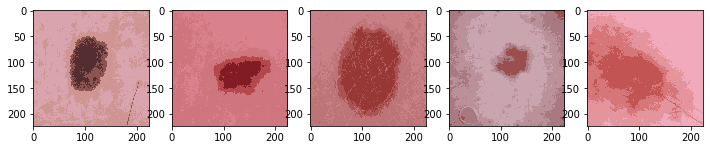

In [299]:
fig, ax = plt.subplots(1, 5, figsize=(12, 12))
for i, axi in enumerate(ax.flat):
    axi.imshow(train_b.loc[i,:].values.reshape(224,224,3))

In [328]:
df = train_b.append(train_m, ignore_index=True)

In [330]:
pca = PCA(n_components=2)
pca.fit_transform(df)
dfp = pd.DataFrame(pca.fit_transform(df), columns= ['pc1', 'pc2']).reset_index()
dfp['label'] = 0

In [331]:
for item in range(0, 200):
    if dfp['index'][item] < 100:
        dfp['label'][item] = 'pc1'
    else:
        dfp['label'][item] = 'pc2'
labels = ['pc1', 'pc2']
colors = ['blue', 'k']

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\yukar\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

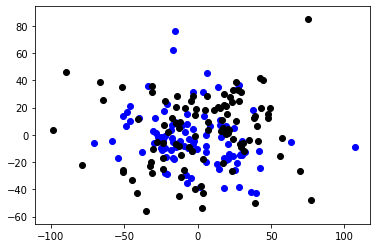

In [332]:
for label, color in zip(labels,colors):
    indices = dfp['label'] == label
    plt.scatter(dfp.loc[indices, 'pc1'],
                dfp.loc[indices, 'pc2'], c = color)